<a href="https://colab.research.google.com/github/evanrjiang/NGG6050/blob/main/Jiang_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise

Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done before collecting data.
2. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
3. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
4. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
5. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

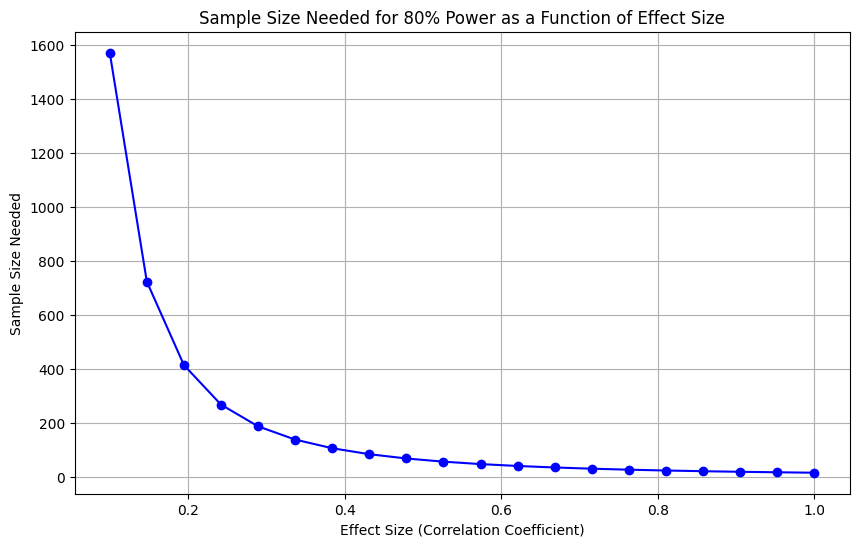

Mean correlation coefficient: -0.0000
Standard deviation of correlation coefficients: 0.0100


In [5]:

# Parameters
n_samples = 10000
n_sim = 10000

# Parameters for distributions
lambda_poisson = 5  # Mean rate (λ) for the Poisson distribution
mu_gaussian = 0  # Mean (μ) for the Gaussian distribution
std_gaussian = 1  # Standard deviation (σ) for the Gaussian distribution

# Initialize arrays to store correlation coefficients
correlation_coefficients = np.zeros(n_sim)

# Simulate data and compute correlation coefficients
for i in range(n_sim):
    LC_spiking_data = np.random.poisson(lam=lambda_poisson, size=n_samples)
    pupil_data = np.random.normal(loc=mu_gaussian, scale=std_gaussian, size=n_samples)
    correlation_matrix = np.corrcoef(LC_spiking_data, pupil_data)
    correlation_coefficients[i] = correlation_matrix[0, 1]

# Power analysis setup
power_analysis = TTestIndPower()
alpha = 0.05  # Significance level
power_target = 0.80  # Desired power

# Define effect sizes (correlation coefficients) for power analysis
effect_sizes = np.linspace(0.1, 1, 20)  # Example range of effect sizes from 0.1 to 0.5

# Calculate required sample sizes for each effect size
sample_sizes = []
for effect_size in effect_sizes:
    sample_size = power_analysis.solve_power(effect_size=effect_size, power=power_target, alpha=alpha, alternative='two-sided')
    sample_sizes.append(sample_size)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, marker='o', linestyle='-', color='b')
plt.xlabel('Effect Size (Correlation Coefficient)')
plt.ylabel('Sample Size Needed')
plt.title('Sample Size Needed for 80% Power as a Function of Effect Size')
plt.grid(True)
plt.show()

# Print summary statistics
print(f'Mean correlation coefficient: {np.mean(correlation_coefficients):.4f}')
print(f'Standard deviation of correlation coefficients: {np.std(correlation_coefficients):.4f}')